<a href="https://colab.research.google.com/github/Preetitamrakar-phd/Internship-At-The-Sparks-Foundation-/blob/main/Task3_EDA_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION #GRIPJAN21**

**Preeti Tamrakar**

**To do:**  Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. As a business manager, try to find out the weak areas where you can work to make more profit. Also, dervive all the business problems.

**STEP 1: Understand the Problem Statement & Import Packages and Datasets.**

In [1]:
# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

# Scientific and Data Manipulation Libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore (1).csv


In [3]:
df= pd.read_csv("SampleSuperstore.csv")

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**STEP 2. Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :**

In [5]:
df.shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("")
display_unique(df)

No of Unique Values in Ship Mode Column are : 4
Actual Unique Values in Ship Mode Column are : ['First Class' 'Same Day' 'Second Class' 'Standard Class']

No of Unique Values in Segment Column are : 3
Actual Unique Values in Segment Column are : ['Consumer' 'Corporate' 'Home Office']

No of Unique Values in Country Column are : 1
Actual Unique Values in Country Column are : ['United States']

No of Unique Values in City Column are : 531
Actual Unique Values in City Column are : ['Aberdeen' 'Abilene' 'Akron' 'Albuquerque' 'Alexandria' 'Allen'
 'Allentown' 'Altoona' 'Amarillo' 'Anaheim' 'Andover' 'Ann Arbor'
 'Antioch' 'Apopka' 'Apple Valley' 'Appleton' 'Arlington'
 'Arlington Heights' 'Arvada' 'Asheville' 'Athens' 'Atlanta'
 'Atlantic City' 'Auburn' 'Aurora' 'Austin' 'Avondale' 'Bakersfield'
 'Baltimore' 'Bangor' 'Bartlett' 'Bayonne' 'Baytown' 'Beaumont' 'Bedford'
 'Belleville' 'Bellevue' 'Bellingham' 'Bethlehem' 'Beverly' 'Billings'
 'Bloomington' 'Boca Raton' 'Boise' 'Bolingbrook' 'Bo

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


By seeing max and min, Sales and Profit are not upto the mark.

In [9]:
# checking for duplicate values
df.duplicated().sum()

17

In [10]:
df.shape

(9994, 13)

In [11]:
#Removing the all Duplicate Values from data
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(9977, 13)

Dropping all the unrequired columns

In [13]:
df=df.drop(['Postal Code','Country'],axis='columns')
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


PLOTTING AN HEATMAP TO KNOW THE COREALATION BETWEEN FEATURES

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


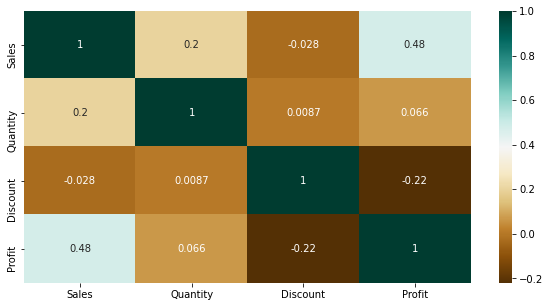

In [14]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

Data Visualization with Ship Mode

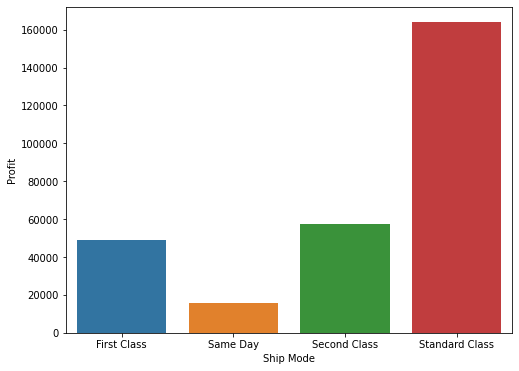

In [15]:
#Grouping Ship Mode column with Profit 

ship_mode1 = df.groupby(['Ship Mode'], as_index=False)['Profit'].sum()

#plotting the bar plot Ship Mode vs Profit

plt.figure(figsize=(8,6))
sns.barplot(ship_mode1['Ship Mode'], ship_mode1['Profit'])
plt.show()

**inference:** From the above graph we can see that who has prefered Ship Mode as Standard Class has more Profit and Same day has less Profit.

In [16]:
#Grouping the Data by Ship Mode column with Sales and Profit

ship_mode2 = df.groupby(['Ship Mode'])[['Sales', 'Profit']].sum()
ship_mode2

,Sales,Profit
Ship Mode,,
First Class,3.513805e+05,48953.6561
Same Day,1.283217e+05,15871.8869
Second Class,4.591770e+05,57446.6516
Standard Class,1.357316e+06,163969.2280


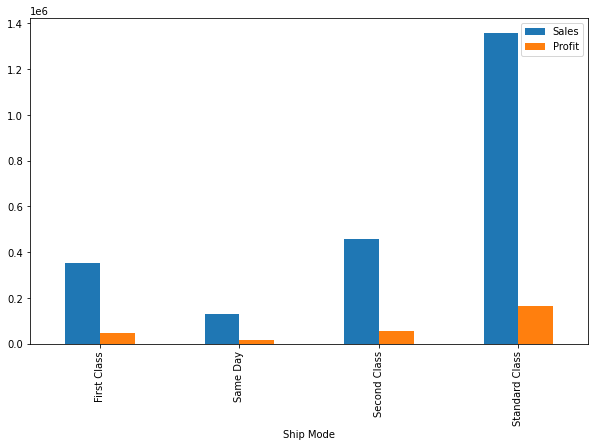

In [17]:
#plotting the bar plot Ship Mode vs Sales and Profit

ship_mode2.plot(kind='bar', figsize=(10,6))
plt.show()

**Inference:** From the above graph we can see that Standard Class has both more Profit and Sales

In [20]:
#Grouping the Data by Ship Mode column with Sales and Profit and Discount

ship_mode3 = df.groupby(['Ship Mode'])['Sales', 'Discount', 'Profit'].sum()


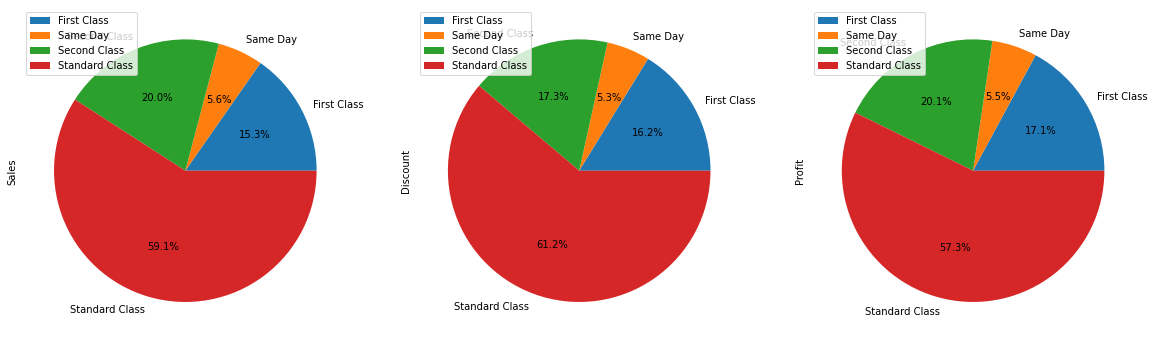

In [22]:
#plotting the pie chart 

ship_mode3.plot.pie(autopct='%1.1f%%', label=ship_mode3.index, subplots=True, figsize=(20,10))
plt.show()

**Inference:** From abow pie chart we can see that Standard Class has more Sales, Profit and Discount

Data Visualization with Segment

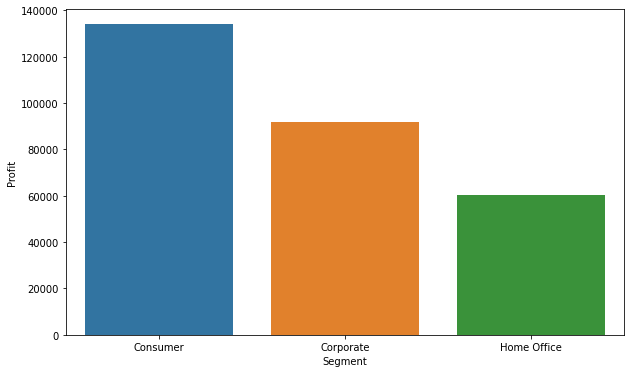

In [23]:
#Grouping the Segment column with Profit 

seg1 = df.groupby(['Segment'], as_index=False)['Profit'].sum()

#plotting the barplot Segment vs Profit

plt.figure(figsize=(10,6))
sns.barplot(seg1['Segment'], seg1['Profit'])
plt.show()


**Inference:** From abow graph we can see that Consumer Segment has more Profit compare to other Segments

In [24]:
#Grouping the Segment with Sales and Profit

seg2 = df.groupby(['Segment'])[['Sales', 'Profit']].sum()
seg2

,Sales,Profit
Segment,,
Consumer,1.160833e+06,134007.4413
Corporate,7.060701e+05,91954.9798
Home Office,4.292927e+05,60279.0015


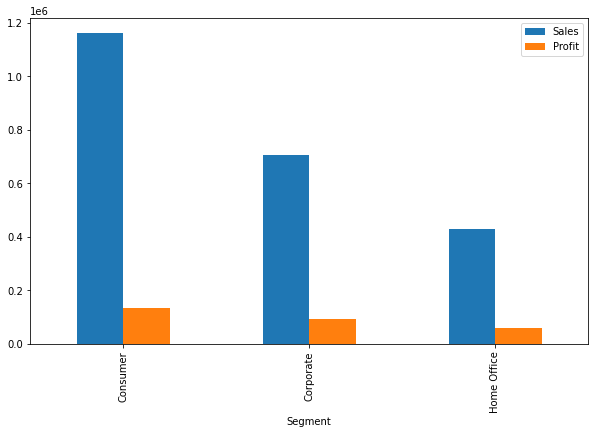

In [25]:
#plotting the bar plot Segment vs Sales and Profit

seg2.plot(kind='bar', figsize=(10,6))
plt.show()

**Inference:** From the above graph we can see that Consumer has more Sales and more Profit compare to other Segments

In [26]:
#Grouping the Data by Segment column with Sales and Profit and Discount

seg3 = df.groupby(['Segment'])['Sales', 'Discount', 'Profit'].sum()

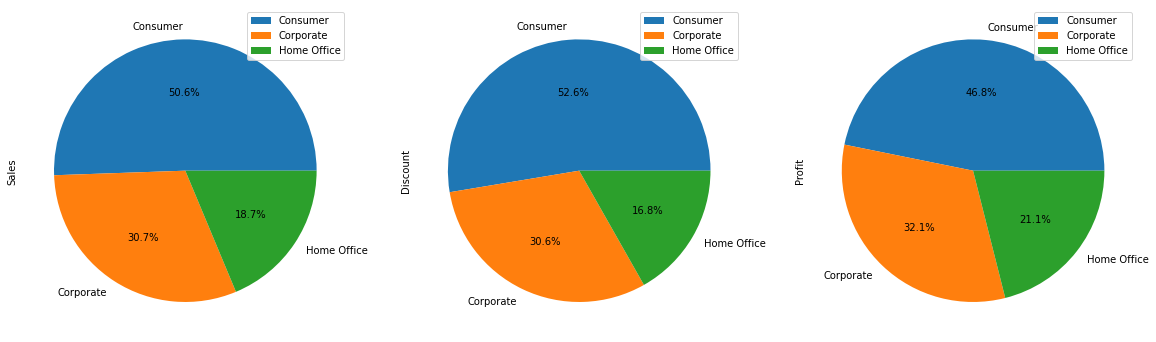

In [27]:
#plotting the pie chart 

seg3.plot.pie(autopct='%1.1f%%', label=seg3.index, subplots=True, figsize=(20,10))
plt.show()

**Inference:** From the above pie chart we can see that Consumer Segment has more Profit and Sales compare to other Segment.

**Data Visualization with State**

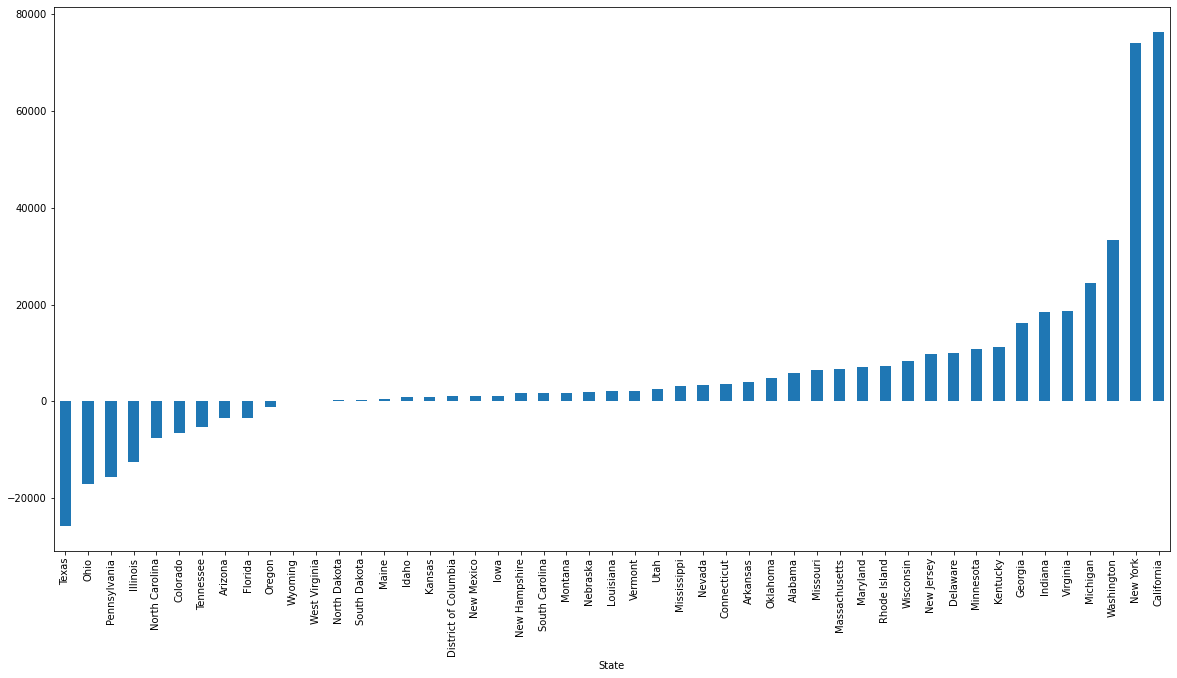

In [28]:
#Grouping the State column with Profit and Sales and plotting the bar plot for Sales

st1 = df.groupby(['State'])[['Profit', 'Sales']].sum()
st1.sort_values('Profit')['Profit'].plot(kind='bar', figsize=(20,10))

**Inference:** From the above graph we can see that Texas has negative Profit means loss than other State and California has more Profit than other Staes.

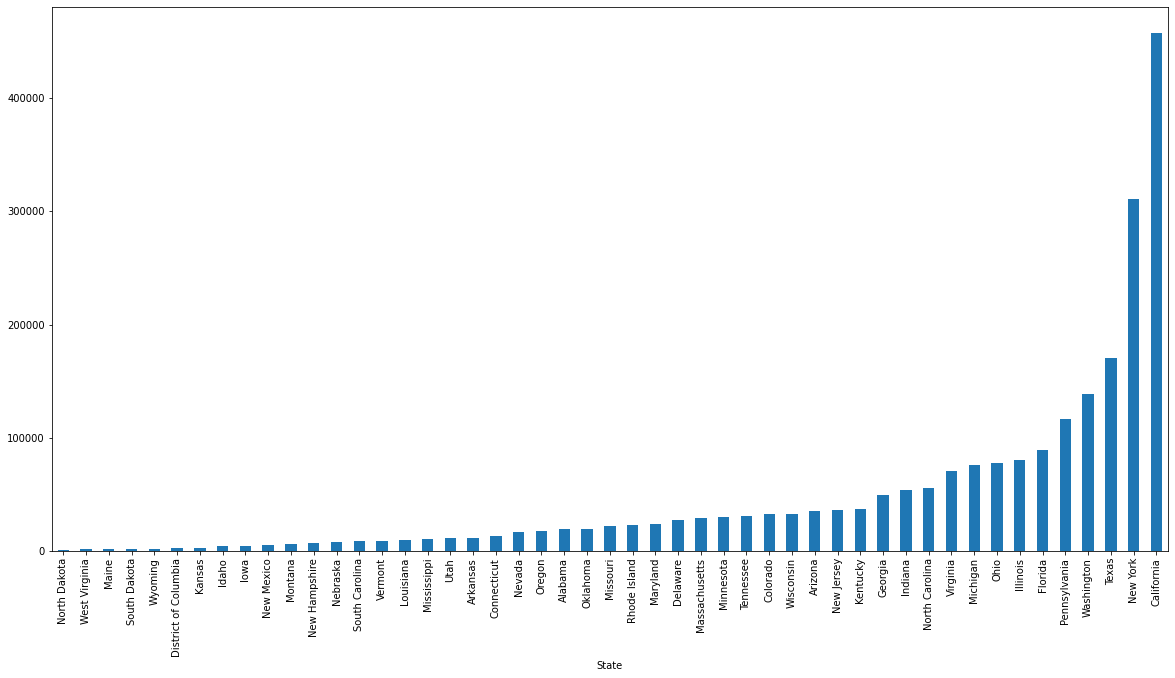

In [29]:
#Grouping the State column with Profit and Sales and plotting the bar plot for Profit

st1 = df.groupby(['State'])[['Profit', 'Sales']].sum()
st1.sort_values('Sales')['Sales'].plot(kind='bar', figsize=(20,10))

**Inference**: From the above graph we can see that North Dakota has comparatively less Sales than other State and California has more Sales than other Staes.

**Data Visualization with Region**

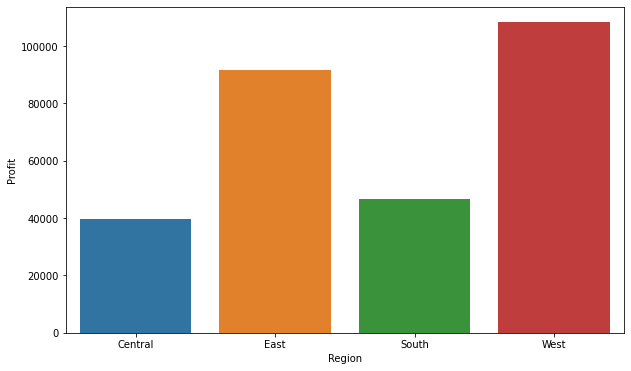

In [30]:
#Groupint the Region column with Profit

rg1 = df.groupby(['Region'], as_index=False)['Profit'].sum()

#plotting the barplot for Region vs Profit

plt.figure(figsize=(10,6))
sns.barplot(rg1['Region'], rg1['Profit'])
plt.show()

**Inference**: From the above graph we can see that East and West Region has comparatively more Profit than other Region.¶


In [31]:
#Grouping the Region with Sales and Profit

rg2 = df.groupby(['Region'])[['Sales', 'Profit']].sum()
rg2

,Sales,Profit
Region,,
Central,500782.8528,39655.8752
East,678435.1960,91506.3092
South,391721.9050,46749.4303
West,725255.6365,108329.8079


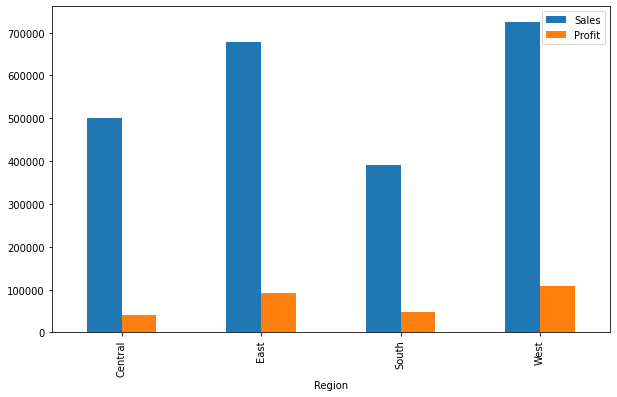

In [32]:
#plotting the barplot Region vs Sales and Profit

rg2.plot(kind='bar', figsize=(10,6))
plt.show()

**Inference:** From the above graph we can see that East and West Region has comparatively more Profit and Sales than other Region.


In [33]:
#Grouping the Data by Region column with Sales and Profit and Discount

rg3 = df.groupby(['Region'])['Sales', 'Discount', 'Profit'].sum()

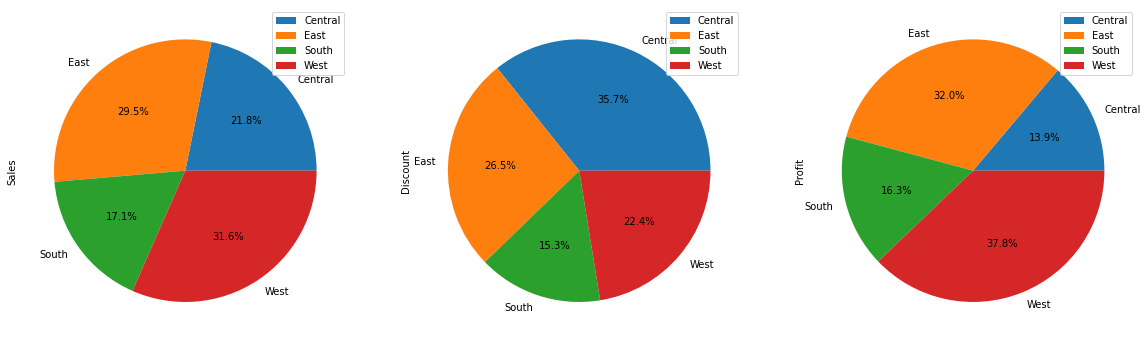

In [34]:
#plotting the pie chart

rg3.plot.pie(autopct='%1.1f%%', label=rg3.index, subplots=True, figsize=(20,10))
plt.show()


**Data Visualization with Category**

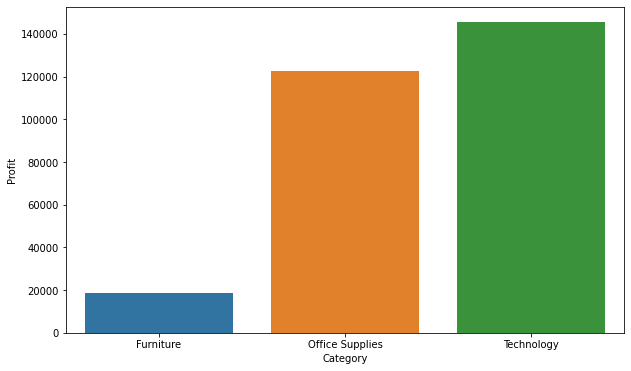

In [35]:
#grouping the Category column with Profit

ctg1 = df.groupby(['Category'], as_index=False)['Profit'].sum()

# plotting the barplot Category vs Profit

plt.figure(figsize=(10,6))
sns.barplot(ctg1['Category'], ctg1['Profit'])
plt.show()

In [36]:
#Grouping the Category with Sales and Profit

ctg2 = df.groupby(['Category'])[['Sales', 'Profit']].sum()
ctg2

,Sales,Profit
Category,,
Furniture,741306.3133,18421.8137
Office Supplies,718735.2440,122364.6608
Technology,836154.0330,145454.9481


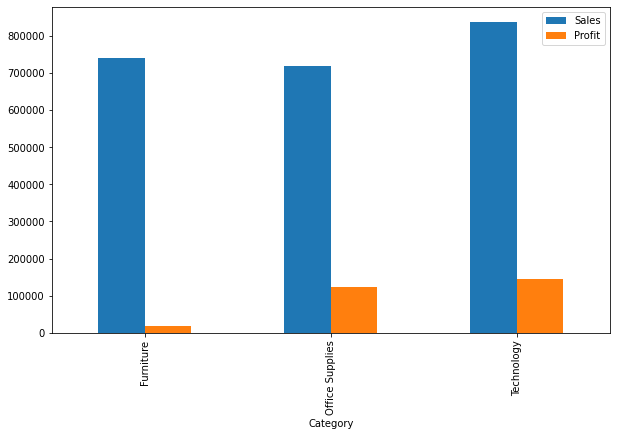

In [37]:
#plotting the barplot with Category vs Sales and Profit

ctg2.plot(kind='bar', figsize=(10,6))
plt.show()

In [38]:
#Grouping the Data by Category column with Sales and Profit and Discount

ctg3 = df.groupby(['Category'])['Sales', 'Discount', 'Profit'].sum()

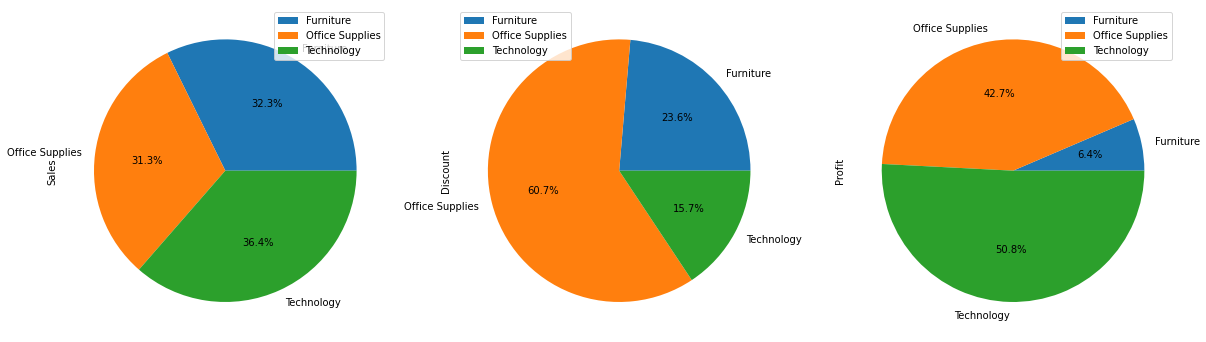

In [39]:
#plotting the pie chart

ctg3.plot.pie(autopct='%1.1f%%', label=ctg3.index, subplots=True, figsize=(20,10))
plt.show()


**Data Visualization with Sub_Category**

In [40]:
#Grouping the Sub_Category with Sales and Profit

sctg1 = df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum()
sctg1

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27107.0320,6524.6118
Binders,203409.1690,30228.0003
Bookcases,114879.9963,-3472.5560
Chairs,327777.7610,26567.1278
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


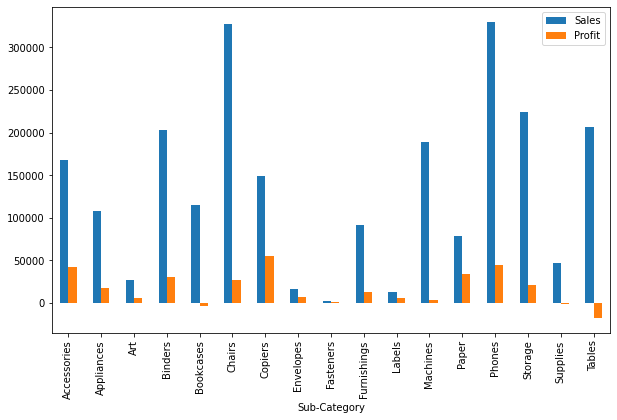

In [41]:
# plotting the barplot with Sub_Category vs Sales and Profit

sctg1.plot(kind='bar', figsize=(10,6))
plt.show()

Therefore, Task #3 is completed.